# Conexão com dados a serem trabalhados no drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Data

/content/drive/MyDrive/Data


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Definindo função que dado um diretóio prepara um os dados no diretório new usado para treinamento

In [ ]:
%cd new

/content/drive/MyDrive/Data/new


In [ ]:
import os
dirFiles = os.listdir()

2


In [ ]:
import shutil

def handleFile(path):
  vid_capture = cv2.VideoCapture('./{}'.format(path))
  frames = {}

  if (vid_capture.isOpened() == False):
    print("Error opening the video file")
  else:
    fps = vid_capture.get(5)
    #print('Frames per second : ', fps,'FPS')
    frame_count = vid_capture.get(7)
    #print('Frame count : ', frame_count)

    n = 60
    frames_step = frame_count // n
    for i in range(20, n-20):
      vid_capture.set(1, i*frames_step)
      success,image = vid_capture.read()  

      scale_percent = 50
      width = int(image.shape[1] * scale_percent / 100)
      height = int(image.shape[0] * scale_percent / 100)
      dim = (width, height)
      print(i)
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #resized = resized[0:270, 105:375]
      frames[i] = resized
      cv2_imshow(resized)
      #cv2.imwrite(path,image)

    string_input = input()
    input_list = string_input.split() 
    input_list = [int(a) for a in input_list]

    origin = path.split('-')

    sin = int(origin[0].split('_')[0][11:])
    signal = int(origin[0].split('_')[1][0:2])
    rept = int(origin[1].split('_')[1][0:1])
    
    for j in range(len(input_list)):
      newPath = "./new/{}/{}-{}-{}-{}.jpg".format(signal, sin, signal, rept, j+1)
      cv2.imwrite(newPath , frames[input_list[j]])
    
    newPathToOld = "./old/{}".format(path)
    shutil.move("./{}".format(path), newPathToOld)

  vid_capture.release()
  cv2.destroyAllWindows()

In [ ]:
for i in range(len(dirFiles)):
  fil = dirFiles[i]
  handleFile(fil)
  print('{} of {}'.format(i, len(dirFiles)))

# Abrindo frames de um arquivo para se testar tranformações de imagens

Frames per second :  30.0 FPS
Frame count :  150.0
0


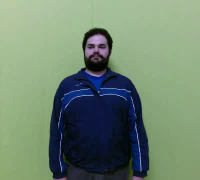

1


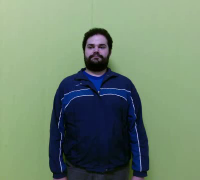

2


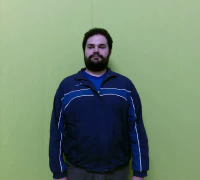

3


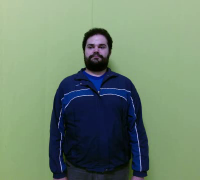

4


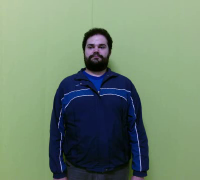

5


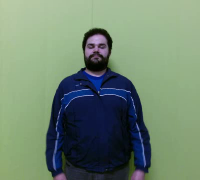

6


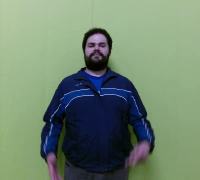

7


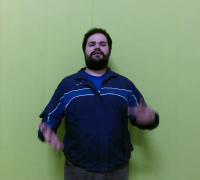

8


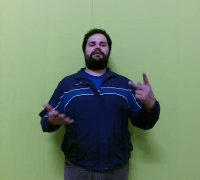

9


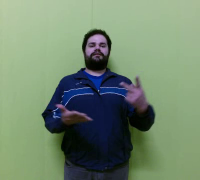

10


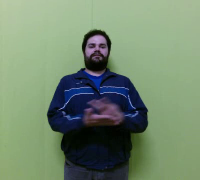

11


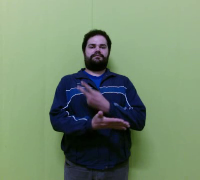

12


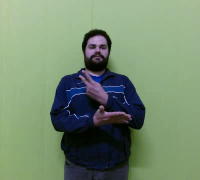

13


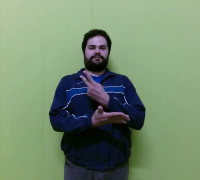

14


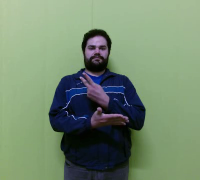

15


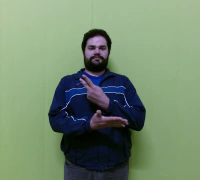

16


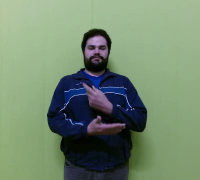

17


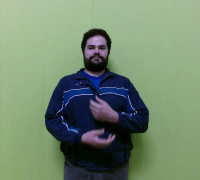

18


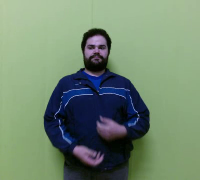

19


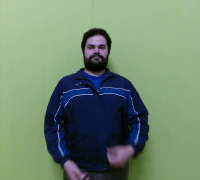

20


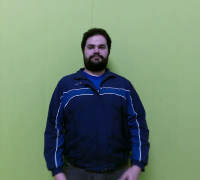

21


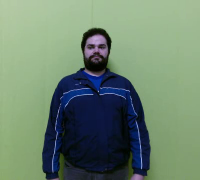

22


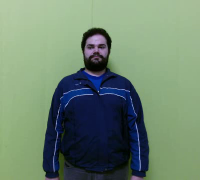

23


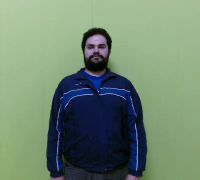

24


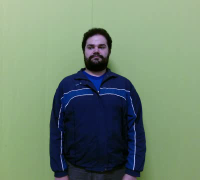

25


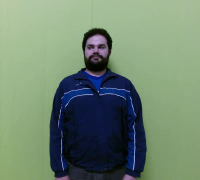

26


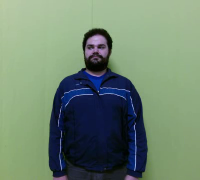

27


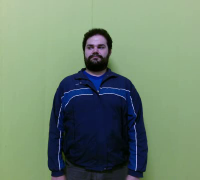

28


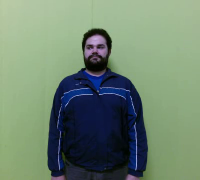

29


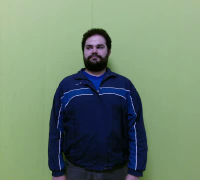

In [ ]:
# Shape from images: (1080, 1920, 3)

vid_capture = cv2.VideoCapture('./old/Sinalizador01_01Acontecer_1-01Acontecer_1RGB.mp4')

frames = []

if (vid_capture.isOpened() == False):
  print("Error opening the video file")
else:
  fps = vid_capture.get(5)
  print('Frames per second : ', fps,'FPS')
  frame_count = vid_capture.get(7)
  print('Frame count : ', frame_count)

  n = 30
  frames_step = frame_count // n
  for i in range(n):
    vid_capture.set(1, i*frames_step)
    success,image = vid_capture.read()  

    scale_percent = 50
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    print(i)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #resized = resized[0:270, 105:375]
    

    frames.append(resized)
    cv2_imshow(resized)
    #cv2.imwrite(path,image)
   

vid_capture.release()
cv2.destroyAllWindows()

# Definindo funções de pré-processamento de imagens

## Morphological Gradient + Otsu binarization

In [ ]:
def morphologicalGradient1(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (1,1), 0) # quanto maior maiores as linhas finais
  # Morphological Gradient
  kernel = np.ones((2,2), np.uint8) # nível de dilatação e reconstrução 2 deixou as linhas mais finas e preservou detalhes
  gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
  cv2_imshow(gradient)
  # Otsu binarization
  ret3,th3 = cv2.threshold(gradient,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  cv2_imshow(th3)

In [ ]:
def morphologicalGradient2(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (1,1), 0) # quanto maior maiores as linhas finais
  # Morphological Gradient
  kernel = np.ones((2,2), np.uint8) # nível de dilatação e reconstrução 2 deixou as linhas mais finas e preservou detalhes
  gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
  th3 = cv2.Canny(gradient,100,130)
            
  cv2_imshow(th3)

## Saliency maps

In [ ]:
def saliency1(data):
  # Original is better in saliency
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  saliency = cv2.saliency.StaticSaliencyFineGrained_create()
  (success, saliencyMap) = saliency.computeSaliency(gray)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  # display the image to our screen
  cv2_imshow(saliencyMap)
  return saliencyMap

## Canny

In [ ]:
def canny1(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray,100,130)
  cv2_imshow(edges)

## Sobel


In [ ]:
# Computing gradient magnitude and orientation with OpenCV

def sobel(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  cv2_imshow(combined)
  cv2_imshow(cv2.Canny(combined,170,200))

In [ ]:
def sobel2(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  cv2_imshow(combined)
  ret3,th3 = cv2.threshold(combined,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  cv2_imshow(th3)
  return th3

In [ ]:
def ada(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)

  th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,9,4)
  cv2_imshow(th3)
  return th3

In [ ]:
def sobel3(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)
# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  cv2_imshow(combined)
  th3 = cv2.adaptiveThreshold(combined,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,9,4)
  cv2_imshow(th3)
  return th3

# Comparando diferentes pré-processamentos de imagem

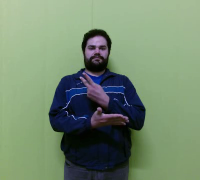

In [ ]:
frame = frames[14]
cv2_imshow(frame)

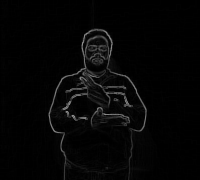

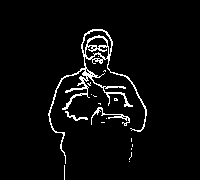

In [ ]:
morphologicalGradient1(frame)

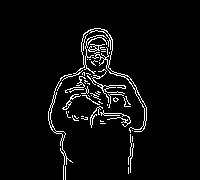

In [ ]:
morphologicalGradient2(frame)

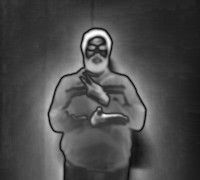

In [ ]:
saliency1(frame)

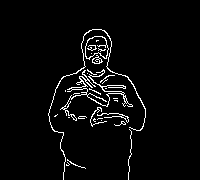

In [ ]:
canny1(frame)

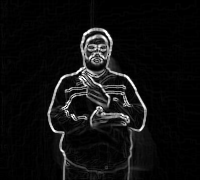

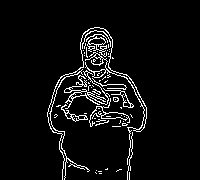

In [ ]:
sobel(frame)

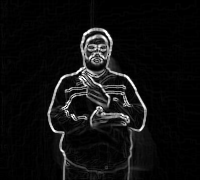

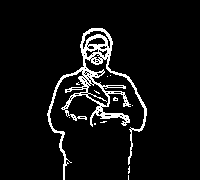

In [ ]:
sobel2(frame)

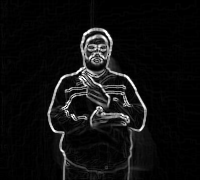

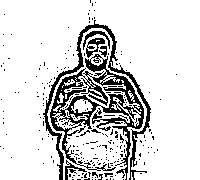

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
sobel3(frame)

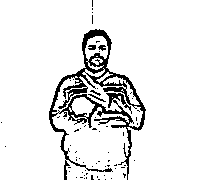

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
ada(frame)

# Aplicando funções de pré-processamento em todos os dados criando sub-datasets para serem usados no treinamento

### Preparação de diretórios

In [ ]:
import os

def prepareDir(newDir):
  rootdir = './new/'
  os.makedirs(newDir)
  for file in os.listdir(rootdir):
      d = os.path.join(newDir, file)
      os.makedirs(d)

In [ ]:
newDir = './saliency/'
prepareDir(newDir)

In [ ]:
newDir = './canny/'
prepareDir(newDir)

In [ ]:
newDir = './sobel/'
prepareDir(newDir)

In [ ]:
newDir = './sobelOtsu/'
prepareDir(newDir)

In [ ]:
newDir = './sobelCanny/'
prepareDir(newDir)

In [ ]:
newDir = './grayAdaptative/'
prepareDir(newDir)

In [ ]:
newDir = './gray/'
prepareDir(newDir)

### Preenchimento de diretórios

In [ ]:
def handleImage(path, func, op):
  img = cv2.imread(path) 
  img2 = func(img)
  cv2.imwrite(path.replace('new', op) , img2)

In [ ]:
def useCanny(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray,100,130)
  return edges

In [ ]:
def useSaliency(data):
  # Original is better in saliency
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  saliency = cv2.saliency.StaticSaliencyFineGrained_create()
  (success, saliencyMap) = saliency.computeSaliency(gray)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  # display the image to our screen
  return saliencyMap

In [ ]:
def useSobel(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  return combined

In [ ]:
def useSobelOtsu(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  ret3,th3 = cv2.threshold(combined,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return th3

In [ ]:
def useSobelCanny(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
  gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
  gX = cv2.convertScaleAbs(gX)
  gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
  combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
  return cv2.Canny(combined,170,200)

In [ ]:
def ada(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)

  th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,9,4)
  return th3

In [ ]:
def gray1(data):
  gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(1,1), 0)
  return gray

In [ ]:
for (dirpath, dirnames, filenames) in os.walk('./new'):
  if(len(filenames) > 0):
    for fi in filenames:
      p = dirpath + '/' + fi
      handleImage(p, ada, 'grayAdaptative')
    print(dirpath + ' done!')

./new/1 done!
./new/2 done!
./new/3 done!
./new/4 done!
./new/5 done!
./new/6 done!
./new/7 done!
./new/8 done!
./new/9 done!
./new/10 done!
./new/11 done!
./new/12 done!
./new/13 done!
./new/14 done!
./new/15 done!
./new/16 done!
./new/17 done!
./new/18 done!
./new/19 done!
./new/20 done!


In [ ]:
import os
o = './sobelCanny/'
dirFiles = os.listdir(o)
print(len(dirFiles))

for i in range(len(dirFiles)):
  
  print('{} : {}'.format(i, len(os.listdir( o + dirFiles[i]))))

20
0 : 180
1 : 180
2 : 180
3 : 180
4 : 180
5 : 180
6 : 180
7 : 180
8 : 180
9 : 180
10 : 180
11 : 180
12 : 180
13 : 180
14 : 180
15 : 180
16 : 180
17 : 180
18 : 180
19 : 180
